In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train_df = pd.read_csv('CAP5610_HW1_input/train.csv')

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [17]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [40]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
train_df.nunique()    # dismiss NaN. Otherwise unique()
#train_df['Survived']

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [76]:
train_df[['Name', 'Sex', 'Ticket' , 'Cabin', 'Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Morley, Mr. William",male,347082,G6,S
freq,1,577,7,4,644


In [78]:
correlation_survivied_Pclass = train_df[['Survived', 'Pclass']].corr()
correlation_survivied_Pclass

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


In [138]:
(train_df['Survived']==1).corr(train_df['Pclass']==1)

0.28590376778374044

In [139]:
(train_df['Survived']==1).corr(train_df['Pclass']==2)

0.09334857241192937

In [140]:
train_df['Survived'].corr(train_df['Pclass']==3)

-0.32230835737297137

In [152]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [154]:
# male & female Survived rate
train_df.pivot_table(values='PassengerId',index='Survived',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [156]:
train_df.pivot_table(values='PassengerId',index='Survived',columns='Age',aggfunc='count')

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,20.00,20.50,21.00,22.00,23.00,23.50,24.00,24.50,25.00,26.00,27.00,28.00,28.50,29.00,30.00,30.50,31.00,32.00,32.50,33.00,34.00,34.50,35.00,36.00,36.50,37.00,38.00,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,45.50,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,1.0,2.0,2.0,6.0,2.0,3.0,NaN,NaN,3.0,1.0,1.0,11.0,7.0,17.0,16.0,12.0,1.0,19.0,16.0,10.0,1.0,15.0,1.0,17.0,12.0,7.0,18.0,2.0,12.0,15.0,2.0,9.0,9.0,1.0,9.0,9.0,1.0,7.0,11.0,1.0,5.0,6.0,9.0,7.0,2.0,4.0,7.0,4.0,6.0,7.0,2.0,3.0,8.0,3.0,2.0,5.0,5.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN
1,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,3.0,NaN,4.0,6.0,6.0,9.0,9.0,3.0,NaN,5.0,11.0,5.0,NaN,15.0,NaN,6.0,6.0,11.0,7.0,NaN,8.0,10.0,NaN,8.0,9.0,1.0,6.0,6.0,NaN,11.0,11.0,NaN,1.0,5.0,5.0,6.0,NaN,2.0,6.0,1.0,3.0,5.0,NaN,NaN,1.0,6.0,4.0,5.0,2.0,3.0,1.0,3.0,1.0,NaN,2.0,NaN,3.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [173]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df['AgeRange'] = pd.cut(train_df['Age'], 16)# Calculate proportion of surviors for each AgeRange
train_df[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)
train_df[['Sex', 'AgeRange', 'Survived']].groupby(['Sex', 'AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,Sex,AgeRange,Survived
0,female,"(0.34, 5.394]",0.761905
16,male,"(0.34, 5.394]",0.652174
17,male,"(5.394, 10.368]",0.400000
1,female,"(5.394, 10.368]",0.300000
18,male,"(10.368, 15.341]",0.285714
2,female,"(10.368, 15.341]",0.750000
3,female,"(15.341, 20.315]",0.735294
19,male,"(15.341, 20.315]",0.129032
4,female,"(20.315, 25.289]",0.755556
20,male,"(20.315, 25.289]",0.103896


<AxesSubplot:xlabel='Fare', ylabel='count'>

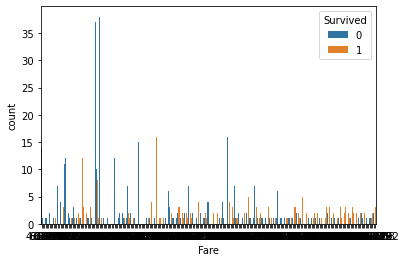

In [202]:
sns.countplot(train_df["Fare"], hue=train_df["Survived"] )

<AxesSubplot:xlabel='FareRange', ylabel='count'>

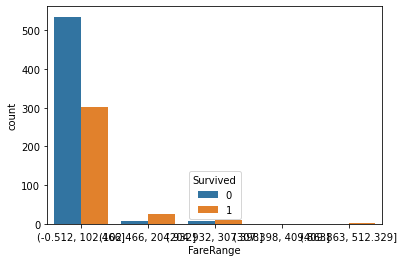

In [323]:
train_df['FareRange'] = pd.cut(train_df['Fare'], 5)
train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)
sns.countplot(train_df["FareRange"], hue=train_df["Survived"] )

In [200]:
train_df["Fare"].corr(train_df["Survived"]==1)

0.2573065223849624

In [211]:
train_df["Cabin"].isnull().sum()

687

# Q16

In [224]:
for i in range(len(train_df["Sex"])):
    if train_df['Sex'][i] == "female":
        train_df['Sex'][i] = 1
    elif train_df['Sex'][i] == "male":
        train_df['Sex'][i] = 0
train_df.rename(columns={"Sex":"Gender"})

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 22.0]","(20.315, 25.289]","(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,C,"(36.0, 41.0]","(35.236, 40.21]","(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 28.0]","(25.289, 30.263]","(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,S,"(31.8, 36.0]","(30.263, 35.236]","(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,NaN,S,"(31.8, 36.0]","(30.263, 35.236]","(-0.512, 102.466]"
5,6,0,3,"Moran, Mr. James",0,28.00,0,0,330877,8.4583,NaN,Q,NaN,"(25.289, 30.263]","(-0.512, 102.466]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,17463,51.8625,E46,S,"(50.0, 80.0]","(50.158, 55.131]","(-0.512, 102.466]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,NaN,S,"(0.419, 14.0]","(0.34, 5.394]","(-0.512, 102.466]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,NaN,S,"(25.0, 28.0]","(25.289, 30.263]","(-0.512, 102.466]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,NaN,C,"(0.419, 14.0]","(10.368, 15.341]","(-0.512, 102.466]"


# Q17

In [228]:
train_df = pd.read_csv('CAP5610_HW1_input/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [294]:
train_x = np.array(train_df["Age"].fillna(train_df["Age"].mean()).count())
train_y = np.array(train_df["Survived"].count())

In [295]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [341]:
def knncls():
    
    x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3)
    std = StandardScaler()
    x_train = std.fit_transform(x_train)
    x_test = std.fit_transform(x_test)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train,y_train)


    y_predict = knn.predict(x_test)
    print("y_test:", y_test)
    print("knn：", y_predict)
    
    return None
if __name__ == '__main__':
    knncls()

TypeError: Singleton array array(891) cannot be considered a valid collection.

In [ ]:
from fancyimpute import KNN
 
train_df["Age"] = pd.DataFrame(KNN(k=5).fit_transform(train_df), columns="Age")

# have some error duing installing fancyimpute package

In [320]:
test_df = pd.read_csv('CAP5610_HW1_input/test.csv')
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Q18

In [316]:
# train_df["Embarked"].fillna(train_df["Embarked"].mode(), inplace=True)
# train_df["Embarked"].count()
a,b,c = 0,0,0
for i in range(len(train_df["Embarked"])):
    if train_df["Embarked"][i] == "Q":
        a += 1
    elif train_df["Embarked"][i] == "S":
        b += 1
    elif train_df["Embarked"][i] == "C":
        c += 1

print("Q=%d,S=%d,C=%d"%(a,b,c))

Q=77,S=644,C=168


In [319]:
train_df["Embarked"].fillna("S", inplace=True)
train_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
30     C
31     C
32     Q
33     S
34     C
35     S
36     C
37     S
38     S
39     C
40     S
41     S
42     C
43     C
44     Q
45     S
46     Q
47     Q
48     C
49     S
50     S
51     S
52     C
53     S
54     C
55     S
56     S
57     C
58     S
59     S
60     C
61     S
62     S
63     S
64     C
65     C
66     S
67     S
68     S
69     S
70     S
71     S
72     S
73     C
74     S
75     S
76     S
77     S
78     S
79     S
80     S
81     S
82     Q
83     S
84     S
85     S
86     S
87     S
88     S
89     S
90     S
91     S
92     S
93     S
94     S
95     S
96     C
97     C
98     S
99     S
100    S
101    S
102    S
103    S
104    S
105    S
106    S
107    S
108    S
109    Q
110    S
1

# 19

In [321]:
test_df["Fare"].mode()

0    7.75
dtype: float64

In [322]:
train_df["Fare"].fillna(7.75, inplace=True)
train_df["Fare"]

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
30      27.7208
31     146.5208
32       7.7500
33      10.5000
34      82.1708
35      52.0000
36       7.2292
37       8.0500
38      18.0000
39      11.2417
40       9.4750
41      21.0000
42       7.8958
43      41.5792
44       7.8792
45       8.0500
46      15.5000
47       7.7500
48      21.6792
49      17.8000
50      39.6875
51       7.8000
52      76.7292
53      26.0000
54      61.9792
55      35.5000
56      10.5000
57       7.2292
58      27.7500
59      46.9000
60       7.2292
61      80.0000
62      

# 20

In [340]:
train_df['FareBand'] = pd.cut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


<AxesSubplot:xlabel='FareBand', ylabel='count'>

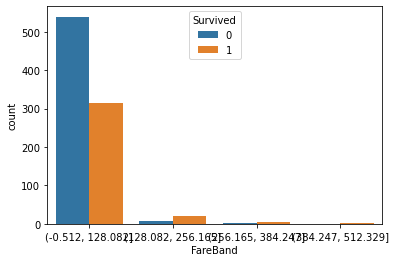

In [332]:
sns.countplot(train_df["FareBand"], hue=train_df["Survived"] )